In [1]:
from aqchem.chemistry import Solute, elements
from aqchem.equilibria import Equilibrium, EqSystem, charge_balance, atom_balance
from IPython.display import Latex, display
import periodictable

In [2]:
def show(s): display(Latex('$'+s+'$'))

In [3]:
substances = H2O, Hp, OHm, NH4p, NH3, Cupp, CuNH31pp, CuNH32pp, CuNH33pp, CuNH34pp, CuNH35pp, Cu2OH2pp, CuOH3m, CuOH4mm, CuOH2 = [#, CuOHp, CuOH2, =
    Solute(n, latex_name=l, formula=periodictable.formula(n)) for n, l in [
        ('H2O', 'H_2O'), ('H{+}', 'H^+'), ('HO{-}', 'OH^-'), ('NH3 + H{+}', 'NH_4^+'),
        ('NH3', 'NH_3'), ('Cu{2+}', 'Cu^{2+}'), ('Cu{2+}NH3', 'Cu(NH_3)^{2+}'),
        ('Cu{2+}(NH3)2', 'Cu(NH_3)_2^{2+}'), ('Cu{2+}(NH3)3', 'Cu(NH_3)_3^{2+}'),
        ('Cu{2+}(NH3)4', 'Cu(NH_3)_4^{2+}'), ('Cu{2+}(NH3)5', 'Cu(NH_3)_5^{2+}'), 
        ('2Cu{2+} + 2HO{-}', 'Cu_2(OH)_2^{2+}'),
        ('Cu{2+} + 3HO{-}', 'Cu(OH)_3^-'), ('Cu{2+} + 4HO{-}', 'Cu(OH)_4^{2-}'),
        ('Cu{2+} + 2HO{-}', 'Cu(OH_2)(s)'),
    ]]
CuOH2.solid = True

In [4]:
show(', '.join([s.latex_name for s in substances])) # + r'(\mathrm{%s})' % (str(s.formula.atoms) + ', ' + str(s.charge))

<IPython.core.display.Latex object>

In [5]:
init_conc = {Hp: 1e-7, OHm: 1e-7, NH4p: 0, NH3: 1.0, Cupp: 1e-2, 
            CuNH31pp: 0, CuNH32pp: 0, CuNH33pp: 0, CuNH34pp: 0, CuNH35pp: 0,
            H2O: 55.5, Cu2OH2pp: 0, CuOH2: 0, CuOH3m: 0, CuOH4mm: 0}

In [6]:
H2O_c = init_conc[H2O]
w_autop = Equilibrium({H2O: 1}, {Hp: 1, OHm: 1}, 10**-14/H2O_c)
NH4p_pr = Equilibrium({NH4p: 1}, {Hp: 1, NH3: 1}, 10**-9.26)
CuOH2_s = Equilibrium({CuOH2: 1}, {Cupp: 1, OHm: 2}, 10**-18.8)
CuOH_B3 = Equilibrium({CuOH2: 1, OHm: 1}, {CuOH3m: 1}, 10**-3.6)
CuOH_B4 = Equilibrium({CuOH2: 1, OHm: 2}, {CuOH4mm: 1}, 10**-2.7)
Cu2OH2 = Equilibrium({Cupp: 2, H2O: 2}, {Cu2OH2pp: 1, Hp: 2}, 10**4.3 * H2O_c**2)
CuNH3_B1 = Equilibrium({CuNH31pp: 1}, {Cupp: 1, NH3: 1}, 10**4.3)
CuNH3_B2 = Equilibrium({CuNH32pp: 1}, {Cupp: 1, NH3: 2}, 10**7.9)
CuNH3_B3 = Equilibrium({CuNH33pp: 1}, {Cupp: 1, NH3: 3}, 10**10.8)
CuNH3_B4 = Equilibrium({CuNH34pp: 1}, {Cupp: 1, NH3: 4}, 10**13.0)
CuNH3_B5 = Equilibrium({CuNH35pp: 1}, {Cupp: 1, NH3: 5}, 10**12.4)
equilibria = w_autop, NH4p_pr, CuNH3_B1, CuNH3_B2, CuNH3_B3, CuNH3_B4, CuNH3_B5, Cu2OH2, CuOH_B3, CuOH_B4, CuOH2_s
skip_subs, skip_eq = (4, 4) # (0, 0), (1, 1), (3, 3), (4, 4), (11, 9)
simpl_subs = substances[:-skip_subs]
simpl_eq = equilibria[:-skip_eq]
simpl_c0 = {k: init_conc[k] for k in simpl_subs}

In [7]:
show(', '.join([s.latex_name for s in simpl_subs]))
show('~')
from math import log10
for eq in simpl_eq:
    ltx = eq.latex()
    show(ltx + '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~lgK = {0:12.5g}'.format(log10(eq.params)))
{k.name: v for k, v in simpl_c0.items()}

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

{'Cu{2+}': 0.01,
 'Cu{2+}(NH3)2': 0,
 'Cu{2+}(NH3)3': 0,
 'Cu{2+}(NH3)4': 0,
 'Cu{2+}(NH3)5': 0,
 'Cu{2+}NH3': 0,
 'H2O': 55.5,
 'HO{-}': 1e-07,
 'H{+}': 1e-07,
 'NH3': 1.0,
 'NH3 + H{+}': 0}

In [8]:
eqsys = EqSystem(simpl_eq, simpl_subs)
import sympy as sp
sp.init_printing()
x, i = sp.symarray('x', eqsys.ns), sp.symarray('i', eqsys.ns)
f = eqsys.f(x, i, norm=True)
subs = [(_, sp.exp(_)) for _ in x]
[_.subs(subs).powsimp() for _ in f]

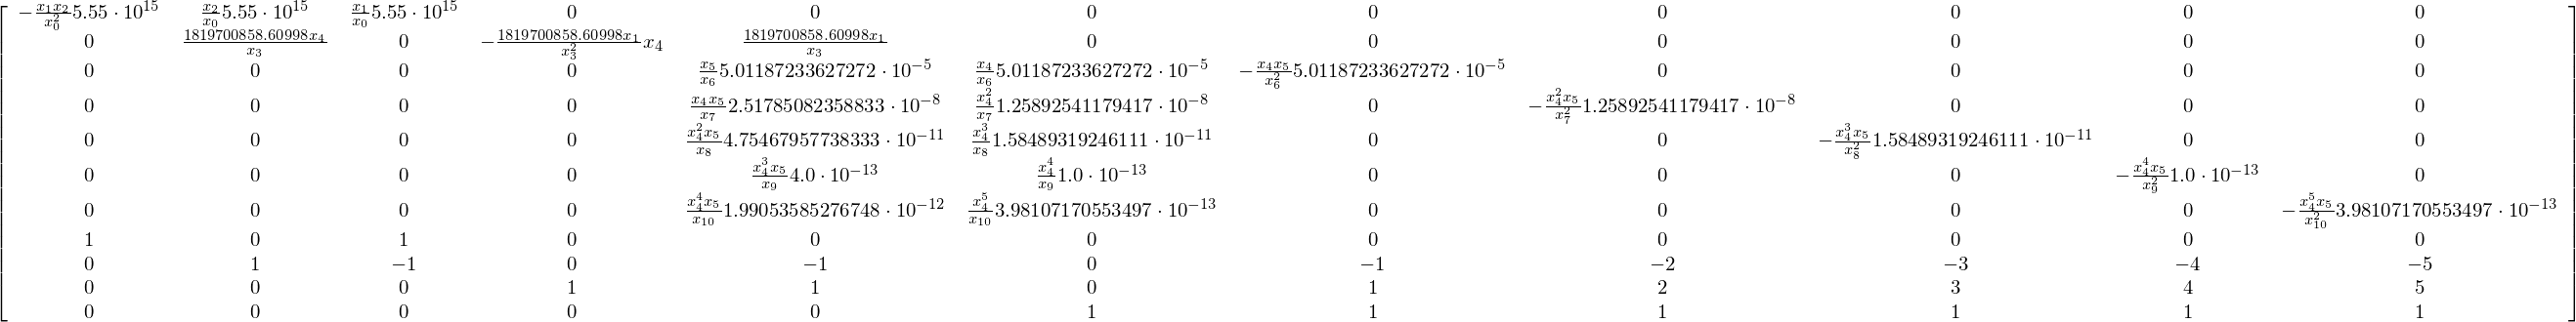

In [9]:
sp.Matrix(1, len(f), lambda _, q: f[q]).jacobian(x)

In [10]:
eqsys.root(simpl_c0, delta=1e-6, method='lm')
#eqsys.root({H2O: 55.5, Hp: 1e-10, OHm: 1e-3, NH3: 1.0, NH4p: 1e-3}, delta=1e-6, method='lm')

aqchem/equilibria.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  tot *= conc**nr


(array([  5.55000015e+01,   9.83288339e-09,   5.90433193e-07,
          1.58061115e-06,   1.00985112e+00,   1.03217731e-02,
          5.24281724e-07,   4.59413913e-08,   4.57929663e-08,
          4.12088912e-08,   4.46633114e-08]),
   status: 1
   cov_x: array([[  2.71611779e+00,  -4.46584236e-03,  -1.71611779e+00,
         -7.17872884e-01,  -1.19119474e-02,   6.20864982e+03,
          3.25335979e-01,   2.85083353e-02,   2.84342711e-02,
          2.84342705e-02,   2.84342700e-02],
       [  2.55028265e-05,   3.83031349e-05,  -2.55028265e-05,
          6.15713171e-03,   2.33576289e-05,   3.47072439e-01,
          1.81867609e-05,   1.59365908e-06,   1.58951988e-06,
          1.58952095e-06,   1.58952202e-06],
       [ -1.71611779e+00,   4.46584236e-03,   1.71611779e+00,
          7.17872884e-01,   1.19119474e-02,  -6.20864982e+03,
         -3.25335979e-01,  -2.85083353e-02,  -2.84342711e-02,
         -2.84342705e-02,  -2.84342700e-02],
       [ -1.68678631e-02,   6.28676208e-03,   1.6867

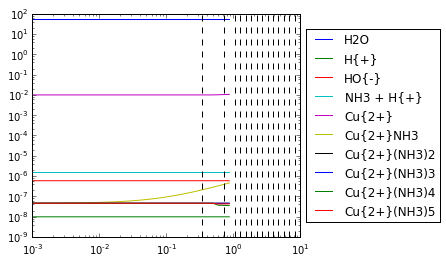

In [39]:
%matplotlib inline
import numpy as np
x, inits_out, success = eqsys.plot(simpl_c0, NH3, np.logspace(-3, 1), delta=1e-6, method='lm',
                                   carry=False)#, pres1st=True, norm=True, scaling=1)

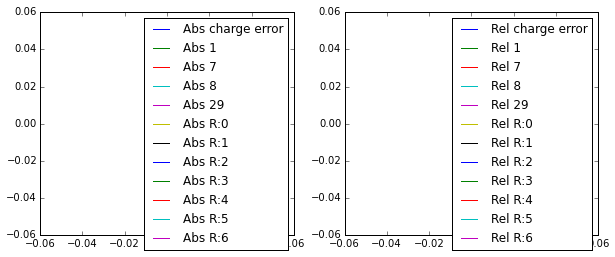

In [12]:
eqsys.plot_errors(x, inits_out, NH3)

In [13]:
for eq in equilibria:
    show(eq.latex())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
reaction_system = EqSystem(equilibria, substances)

In [15]:
import sympy as sp
#sp.init_printing()
y = sp.symbols('y:'+str(len(substances)))
s = sp.symbols('s')

ys = []
class LatexSymbol(sp.Symbol):
    def _print_latex(self):
        return self.name
  
for sbs in reaction_system.substances:
    ys.append(LatexSymbol('[' + sbs.latex_name + ']'))
    print(ys[-1].name)
ys

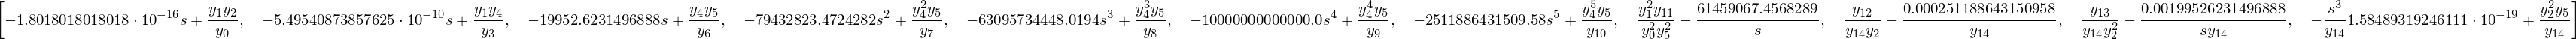

In [16]:
qk = reaction_system.qk(y, scaling=s)
qk

In [17]:
charge_balance(substances, y)

In [18]:
atom_balance(substances, y, 1)

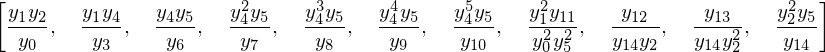

In [19]:
reaction_system.equilibrium_quotients(y)

In [20]:
chg_vec = reaction_system.charge_balance_vector()
atm_vecs, atm_nrs = reaction_system.atom_balance_vectors()
import numpy as np
arr = np.array(atm_vecs)
arr.shape, atm_nrs, arr, chg_vec

((4, 15),
 [1, 7, 8, 29],
 array([[ 2,  1,  1,  4,  3,  0,  3,  6,  9, 12, 15,  2,  3,  4,  2],
        [ 0,  0,  0,  1,  1,  0,  1,  2,  3,  4,  5,  0,  0,  0,  0],
        [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  3,  4,  2],
        [ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1]]),
 [0, 1, -1, 1, 0, 2, 2, 2, 2, 2, 2, 2, -1, -2, 0])

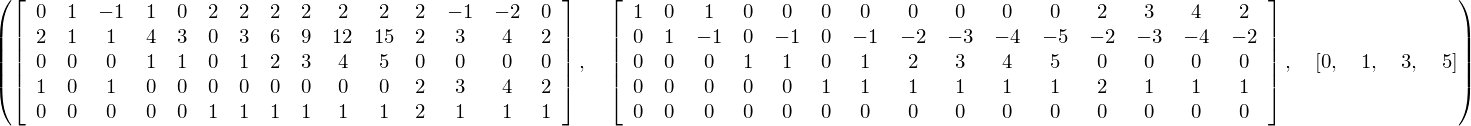

In [21]:
import sympy
M = sympy.Matrix([chg_vec] + atm_vecs)
rref, pivot = M.rref()
M, rref, pivot

In [22]:
rref, pivot = reaction_system.rref()
atm_nrs = reaction_system.atom_balance_vectors()[1]
[0] + atm_nrs
#reaction_system.independent_atoms_from_pivot(pivot)

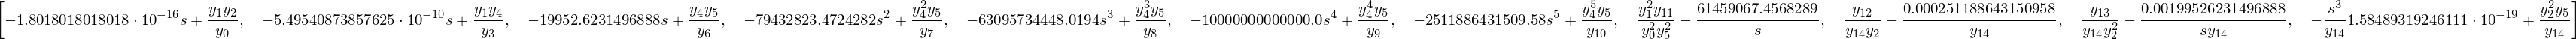

In [23]:
qk

In [24]:
c0arr = np.array([init_conc[k] for k in reaction_system.substances])
scaling = 1.0
logC = False
f, j = reaction_system.num_cb_factory(c0arr*scaling, True, scaling=scaling, logC=logC)
c0arr

array([  5.55000000e+01,   1.00000000e-07,   1.00000000e-07,
         0.00000000e+00,   1.00000000e+00,   1.00000000e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [25]:
x0 = c0arr+1e-17
f(np.log(x0) if logC else x0)

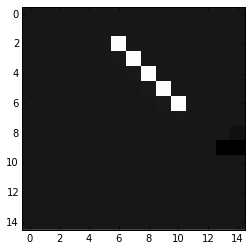

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
jmat = j(np.log(x0) if logC else x0)
plt.imshow(jmat, cmap='binary', interpolation='None')
jmat[:7, :4].tolist()

In [27]:
len(substances)

In [28]:
from scipy.optimize import root
x0 = [1]*len(substances)
root(f, x0, jac=j)

/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:237: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  status: 5
 success: False
     qtf: array([ -2.62994617e+05,   2.04636999e+03,   6.28696379e+03,
        -2.61702101e+04,  -2.72150272e+12,   9.93044797e+12,
        -7.04977559e+09,  -1.78219819e+10,  -5.27610754e+11,
         6.59216706e+07,   6.36301090e+06,   1.12792268e+05,
        -5.96415482e+05,   1.56676628e+06,  -6.14357787e+07])
    nfev: 11
       r: array([ -2.91605114e+00,   1.01177853e+00,  -2.73185689e+00,
         7.86688655e-23,  -3.97572785e-04,  -8.48862408e-05,
        -7.23163418e-14,   2.15355548e-13,   1.97760887e-11,
         5.58409334e-05,  -6.05410104e-05,  -6.85854069e-01,
        -1.02878854e+00,  -1.37171805e+00,  -6.85859027e-01,
        -1.66358680e+01,   5.86180778e-02,  -1.96807452e+01,
         1.24558169e+00,   7.00577962e-07,   6.01110806e-02,
         1.20222161e-01,   1.80333242e-01,   2.40443880e-01,
         3.00555912e-01,   7.85087918e-02,   1.17763248e-01,
         1.57017664e-01,   7.85088320e-02,  -1.16798541e+02,
        -9.87724204e-03

In [29]:
reaction_system.root(init_conc, scaling=scaling, logC=logC, delta=1e-15)

(None,
   status: 5
 success: False
     qtf: array([ -3.12747802e+06,  -3.25106685e+08,   2.55432232e+12,
        -6.11127609e+05,  -8.89104590e+09,  -1.76079941e+12,
        -3.84819583e+07,   1.05906132e+11,   9.83097031e+12,
        -3.65700034e+08,   1.86221862e+04,  -1.18862331e+05,
        -6.14588487e+07,   5.64319806e+03,  -3.82930783e+03])
    nfev: 11
       r: array([  1.00000000e+00,  -2.87119187e-08,  -2.65611699e+14,
        -6.95917459e-12,  -7.56221972e+09,  -1.20616193e+12,
         1.31922486e+02,   8.38884552e+12,   7.21902801e+18,
         1.14592104e+21,   2.86206413e+20,   1.99999999e+00,
        -1.20965457e+07,   6.51005127e+20,  -1.23375798e+13,
        -1.79487046e+02,  -2.76107901e+16,   9.62999327e+01,
        -7.86105665e+11,  -1.25382594e+14,   1.37135735e+04,
         8.72034831e+14,   7.50430301e+20,   1.19120451e+23,
         2.97516458e+22,   1.11418225e-02,  -1.25745691e+09,
         6.76730956e+22,  -1.28251251e+15,   2.16939306e+20,
         1.2262

In [30]:
i = sp.symarray('i', len(y))
print(i)
reaction_system.f(y, i, scaling=s, reduced=True)

[i_0 i_1 i_2 i_3 i_4 i_5 i_6 i_7 i_8 i_9 i_10 i_11 i_12 i_13 i_14]


([-1.8018018018018e-16*s + y2*(i_1*s - 5*i_10*s - 2*i_11*s - 3*i_12*s - 4*i_13*s - 2*i_14*s - i_2*s - i_4*s - i_6*s - 2*i_7*s - 3*i_8*s - 4*i_9*s + 5*y10 + 2*y11 + 3*y12 + 4*y13 + 2*y14 + y2 + y4 + y6 + 2*y7 + 3*y8 + 4*y9)/(i_0*s + 2*i_11*s + 3*i_12*s + 4*i_13*s + 2*i_14*s + i_2*s - 2*y11 - 3*y12 - 4*y13 - 2*y14 - y2),
  -5.49540873857625e-10*s + y4*(i_1*s - 5*i_10*s - 2*i_11*s - 3*i_12*s - 4*i_13*s - 2*i_14*s - i_2*s - i_4*s - i_6*s - 2*i_7*s - 3*i_8*s - 4*i_9*s + 5*y10 + 2*y11 + 3*y12 + 4*y13 + 2*y14 + y2 + y4 + y6 + 2*y7 + 3*y8 + 4*y9)/(5*i_10*s + i_3*s + i_4*s + i_6*s + 2*i_7*s + 3*i_8*s + 4*i_9*s - 5*y10 - y4 - y6 - 2*y7 - 3*y8 - 4*y9),
  -19952.6231496888*s + y4*(i_10*s + 2*i_11*s + i_12*s + i_13*s + i_14*s + i_5*s + i_6*s + i_7*s + i_8*s + i_9*s - y10 - 2*y11 - y12 - y13 - y14 - y6 - y7 - y8 - y9)/y6,
  -79432823.4724282*s**2 + y4**2*(i_10*s + 2*i_11*s + i_12*s + i_13*s + i_14*s + i_5*s + i_6*s + i_7*s + i_8*s + i_9*s - y10 - 2*y11 - y12 - y13 - y14 - y6 - y7 - y8 - y9)/y7,
  -6

In [31]:
f_elim, j_elim, elim, elm_cbs = reaction_system.num_cb_factory(c0arr*scaling, True, scaling=scaling, logC=logC, reduced=True)
print(elim)

[0, 1, 3, 5]


In [32]:
c0arr_elim = np.array([x for idx, x in enumerate(c0arr) if idx not in elim]) + 1e-13
x0elim = np.log(c0arr_elim) if logC else c0arr_elim
f_elim(x0elim)

array([  1.00000100e-07,   1.00000000e+00,   1.00000000e-13,
         1.00000000e-13,   1.00000000e-13,   1.00000000e-13,
         1.00000000e-13,   1.00000000e-13,   1.00000000e-13,
         1.00000000e-13,   1.00000000e-13])

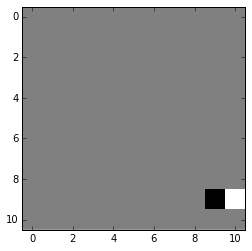

In [33]:
jmat = j_elim(x0elim)
plt.imshow(jmat, cmap='binary', interpolation='None')
x0elim

In [34]:
jmat

matrix([[  3.60365586e-09,   1.80180360e-09,   1.80180360e-09,
           3.60360721e-09,   5.40541081e-09,   7.20721441e-09,
           9.00901802e-09,   3.60360721e-09,   5.40541082e-09,
           7.20721443e-09,   3.60360721e-09],
        [ -6.25065875e+11,   3.90712036e+16,   3.90712036e+16,
           7.81424072e+16,   1.17213611e+17,   1.56284814e+17,
           1.95356018e+17,  -1.25013175e+12,  -1.87519762e+12,
          -2.50026350e+12,  -1.25013175e+12],
        [  0.00000000e+00,   1.00000000e+11,  -1.00000000e+24,
          -1.00000000e+13,  -1.00000000e+13,  -1.00000000e+13,
          -1.00000000e+13,  -2.00000000e+13,  -1.00000000e+13,
          -1.00000000e+13,  -1.00000000e+13],
        [  0.00000000e+00,   2.00000000e+11,  -1.00000000e+13,
          -1.00000000e+24,  -1.00000000e+13,  -1.00000000e+13,
          -1.00000000e+13,  -2.00000000e+13,  -1.00000000e+13,
          -1.00000000e+13,  -1.00000000e+13],
        [  0.00000000e+00,   3.00000000e+11,  -1.00000000e+1

In [35]:
reaction_system.root(init_conc, scaling=1e8, init_iter=100)

(None,
   status: 5
 success: False
     qtf: array([  1.25492429e+28,   1.27445376e+26,  -9.21137068e+31,
        -7.05329318e+24,   2.50270361e+52,   1.02469896e+45,
         5.12762637e+14,   2.34409914e+23,   9.44737285e+35,
         8.67316394e+21,  -7.98097666e+20,  -1.56411199e+11,
        -1.05013344e+15,  -7.23432483e+14,  -4.05324571e+14])
    nfev: 11
       r: array([  1.00000000e+00,  -2.53005845e-49,   1.00000000e+00,
        -1.83608233e-52,   3.05069429e+24,  -1.76264253e+30,
        -7.21161282e-41,  -4.12919828e-16,  -2.53716048e+10,
        -7.95883941e+27,   3.13618227e+39,   2.00000000e+00,
         3.00000000e+00,   4.00000000e+00,   2.00000000e+00,
        -9.90849712e+01,   1.00923479e-02,   7.19845293e-02,
         3.09817002e+22,  -1.79007325e+28,   1.00923479e-02,
         2.01846958e-02,  -2.57664445e+08,  -8.08269701e+25,
         3.18498838e+37,   2.01846958e-02,   3.02770437e-02,
         4.03693915e-02,   2.01846958e-02,  -2.63551887e+03,
         2.7565